In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from matplotlib.ticker import MaxNLocator

from cv_charge_discharge import Ec

In [12]:

# paths = {'0I_03' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03',
#          '0I_04' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04', 
#          '0I_07' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07',
#          '0I_08' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
#          '0I_09' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
#          '0I_10' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
#          '0I_11' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11',
#          '0I_12' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_12'}

# lsb_09 = pd.DataFrame()
# for i in paths.keys():
#     capacity = Ec.Electrochem(paths[i], 80)
#     capacity['Sample'] = i
#     lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
#     plt.ioff()
# fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
# sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 100)


<Figure size 432x288 with 0 Axes>

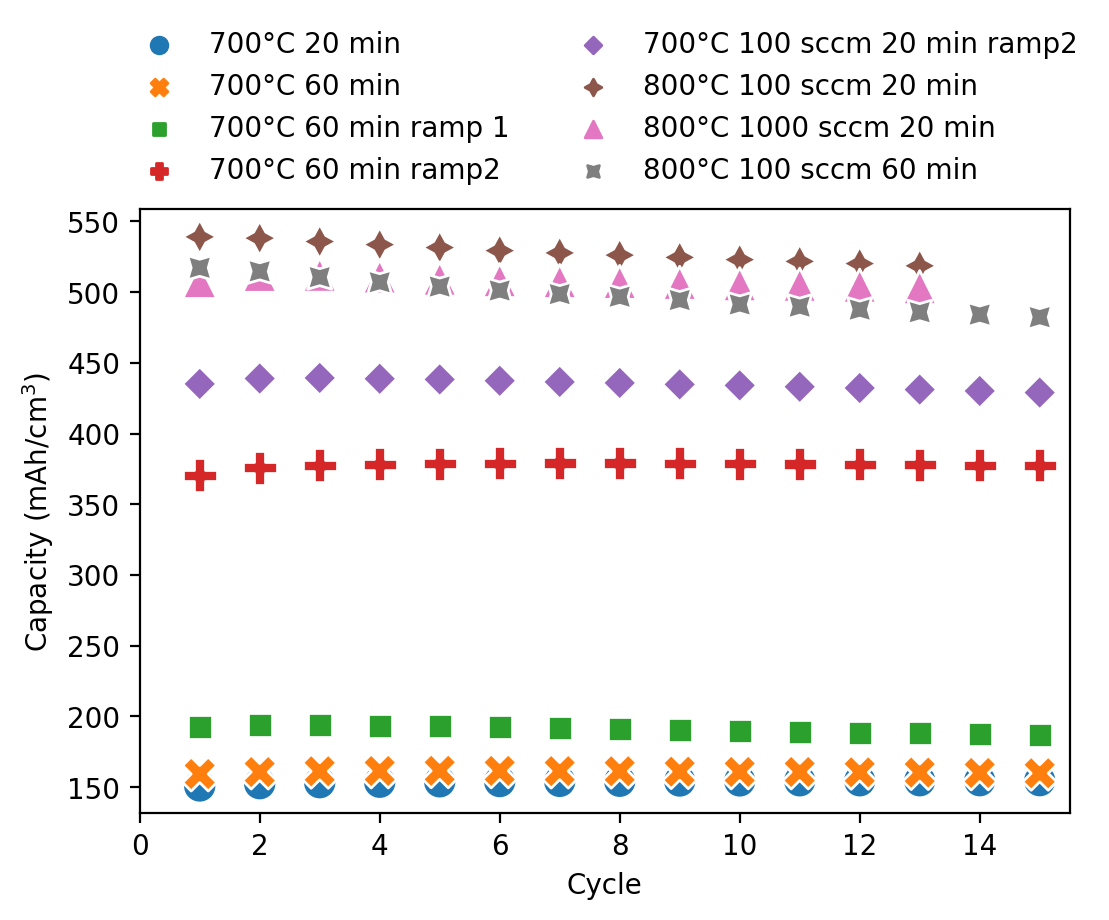

In [13]:

paths = {'700°C 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03',
         '700°C 60 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04', 
         '700°C 60 min ramp 1' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07',
         '700°C 60 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
         '700°C 100 sccm 20 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
         '800°C 100 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
         '800°C 1000 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11',
         '800°C 100 sccm 60 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_12',
         '750°C 100 sccm 20 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_13'
         }
save_path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09'
lsb_09 = pd.DataFrame()
for i in paths.keys():
    capacity = Ec.Electrochem(paths[i], save_path, 80)
    capacity['Sample'] = i
    lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
ax = sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 150)
sns.move_legend(ax, "lower center", ncol = 2, bbox_to_anchor=(0.5, 1), frameon = False, title = None)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlim(0,15.5)
lsb_09.to_csv(r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\lsb_09.txt', index = False)

,Capacity (mAh/cm$^3$),Cycle,Sample
0,150.841124,1,700°C 20 min
1,152.462931,2,700°C 20 min
2,153.165812,3,700°C 20 min
3,153.476073,4,700°C 20 min
4,153.792506,5,700°C 20 min
...,...,...,...
132,480.200729,16,800°C 100 sccm 60 min
133,478.686252,17,800°C 100 sccm 60 min
134,476.888077,18,800°C 100 sccm 60 min
135,475.331048,19,800°C 100 sccm 60 min


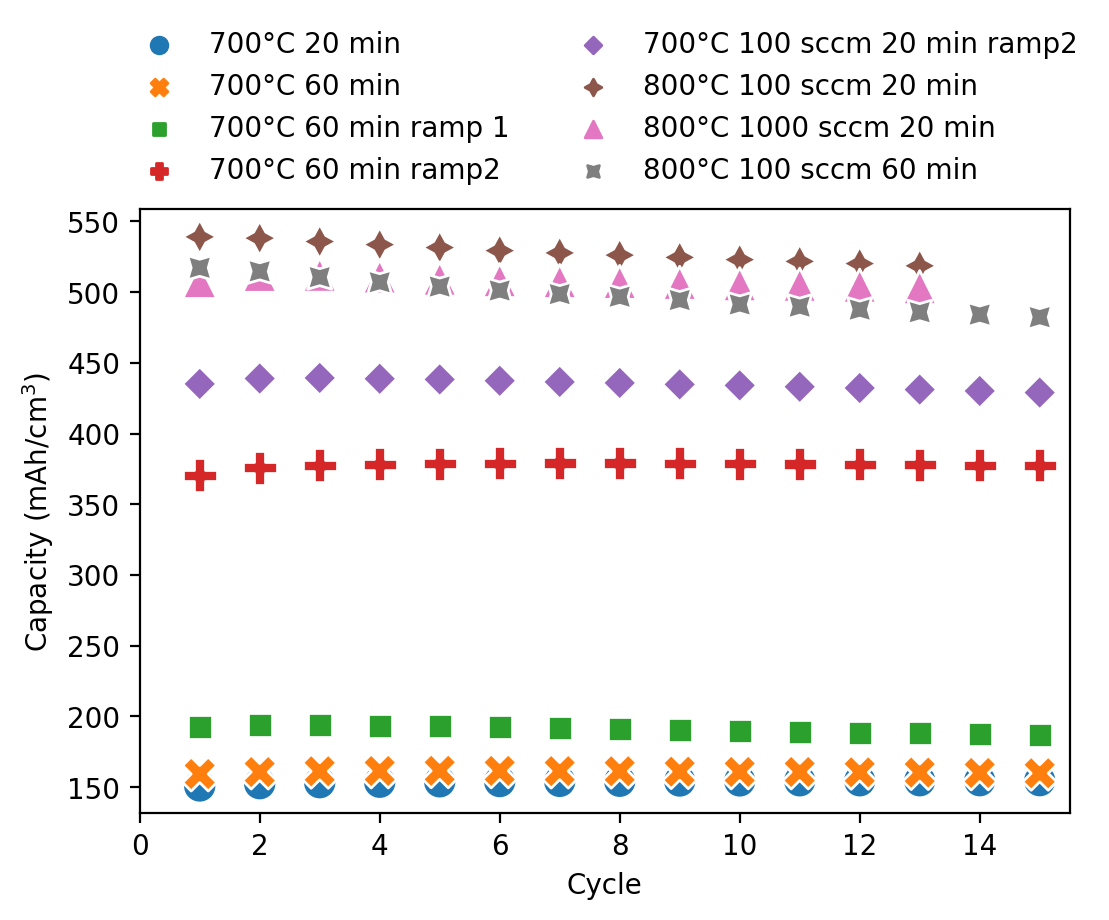

In [14]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\lsb_09.txt'
df = pd.read_csv(path)
fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
ax = sns.scatterplot(data = df, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 150)
sns.move_legend(ax, "lower center", ncol = 2, bbox_to_anchor=(0.5, 1), frameon = False, title = None)
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # x axis only integers
plt.xlim(0,15.5)
df

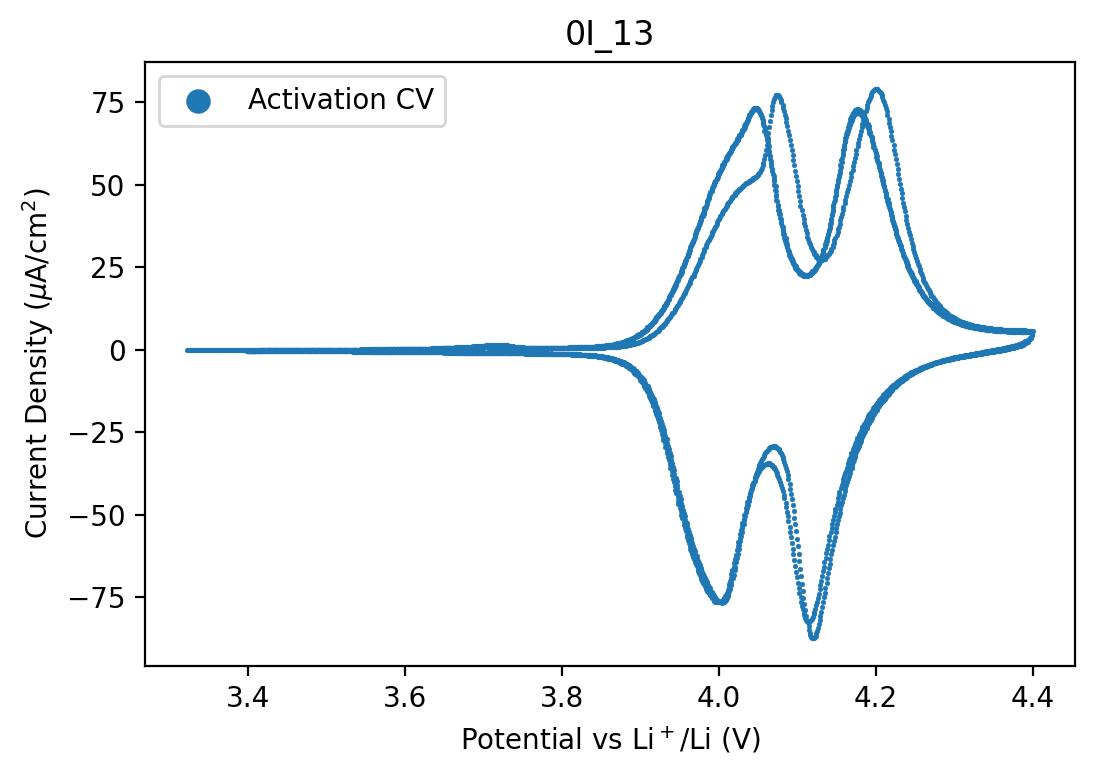

ValueError: Filled contours require at least 2 levels.

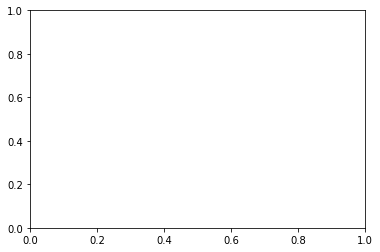

In [2]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_13'
sp = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_13\test.txt' # save path
capacity = Ec.Electrochem(path, sp, 80)